<a href="https://colab.research.google.com/github/Vrishali04/Bike_sharing_demand_sharing_Regression_capstone_project/blob/main/Bike_sharing_demand_prediction_regression_capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


sns.set()

In [ ]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Bike sharing demand Prediction Regression Project/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='unicode_escape')

Checking first 5 rows of given data

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Checking last 5 rows of given data

In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


List of columns present in our dataset

In [ ]:
# Extracting from pandas columns method

print('Columns in our data:')

df.columns

Columns in our data:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Getting the shape of the dataset i.e. number of rows and columns**

In [ ]:
# Extracting from pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
df.shape

Shape of our dataset : 


(8760, 14)

In [ ]:
print('Count of Rows:',df.shape[0])
print('Count of Columns:',df.shape[1])

Count of Rows: 8760
Count of Columns: 14


**Checking the type of data present in each column of given dataset**

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### **Observation :**

There are **String**, **Interger** and **Float** data types in the given dataset.

Also **Date** column is in string format we have to convert it into **Datetime** format we will look into it further.

### **Checking the numerical and categorical feature count**

In [ ]:
# Selecting the categorical column only
cat_cols = df.select_dtypes(include = 'object').columns
print('count of categorical columns :',len(cat_cols))

count of categorical columns : 4


In [ ]:
# Selecting the numerical column only
num_cols = df.select_dtypes(include = 'number').columns
print('count of Numerical columns :',len(num_cols))

count of Numerical columns : 10


**Info of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**5 statistical summary of the given dataset**

In [ ]:
# For numerical columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# For categorical columns
df.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


**Data cleaning and handling i.e.**

**Handling missing values and duplicate data present in the given dataset**

### **Extracting the missing value**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### **Observation :**

There is no missing value present in our dataset

**Extracting the duplicate data present in our dataset**

In [ ]:
df[df.duplicated()].shape


(0, 14)

### **Observation :**

Here we can observ that there is no missing value in our dataset



### **Feature understanding and transformation**

* **As we have already seen that the date column is in string for and we have to convert it into datetime format**

In [ ]:
# changing from string to datetime format using pandas to_datetime function
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

### **Now we can see that we have chaged our Date column to datetime format**

### **We need more columns to analyse our data as we can extract days, months, years form our Date column which will help us to check the data particularly day wise as well as month wise and yearly also**

In [ ]:
# creating a day column
df['day'] = df['Date'].dt.day_name()

# creating a month column
df['month'] = df['Date'].dt.month_name()

# creating a year column
df['year'] = df['Date'].dt.year

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
day                                  object
month                                object
year                                  int64
dtype: object

#### **As we can see that we have created 3 new column day, month and year from Date column**

### Exploratory Data Analysis (EDA)

1. Exploratory Data Analysis can be defined as it is process of performing initial investigations on a data with the help of      different patterns and graphical representations. In EDA we observe the data from multiple angles so that we can grab the      desired analysis outcome.


2. In EDA, we are going to explore the data and we will try to find the missing data as well the outliers present in our          dataset. Also we will check different data types present in different forms and visualize our data to get more insights from    data so that we can properly understand what actually the data is.

**Let us now check the distriburion of each column in our dataset**

In [ ]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

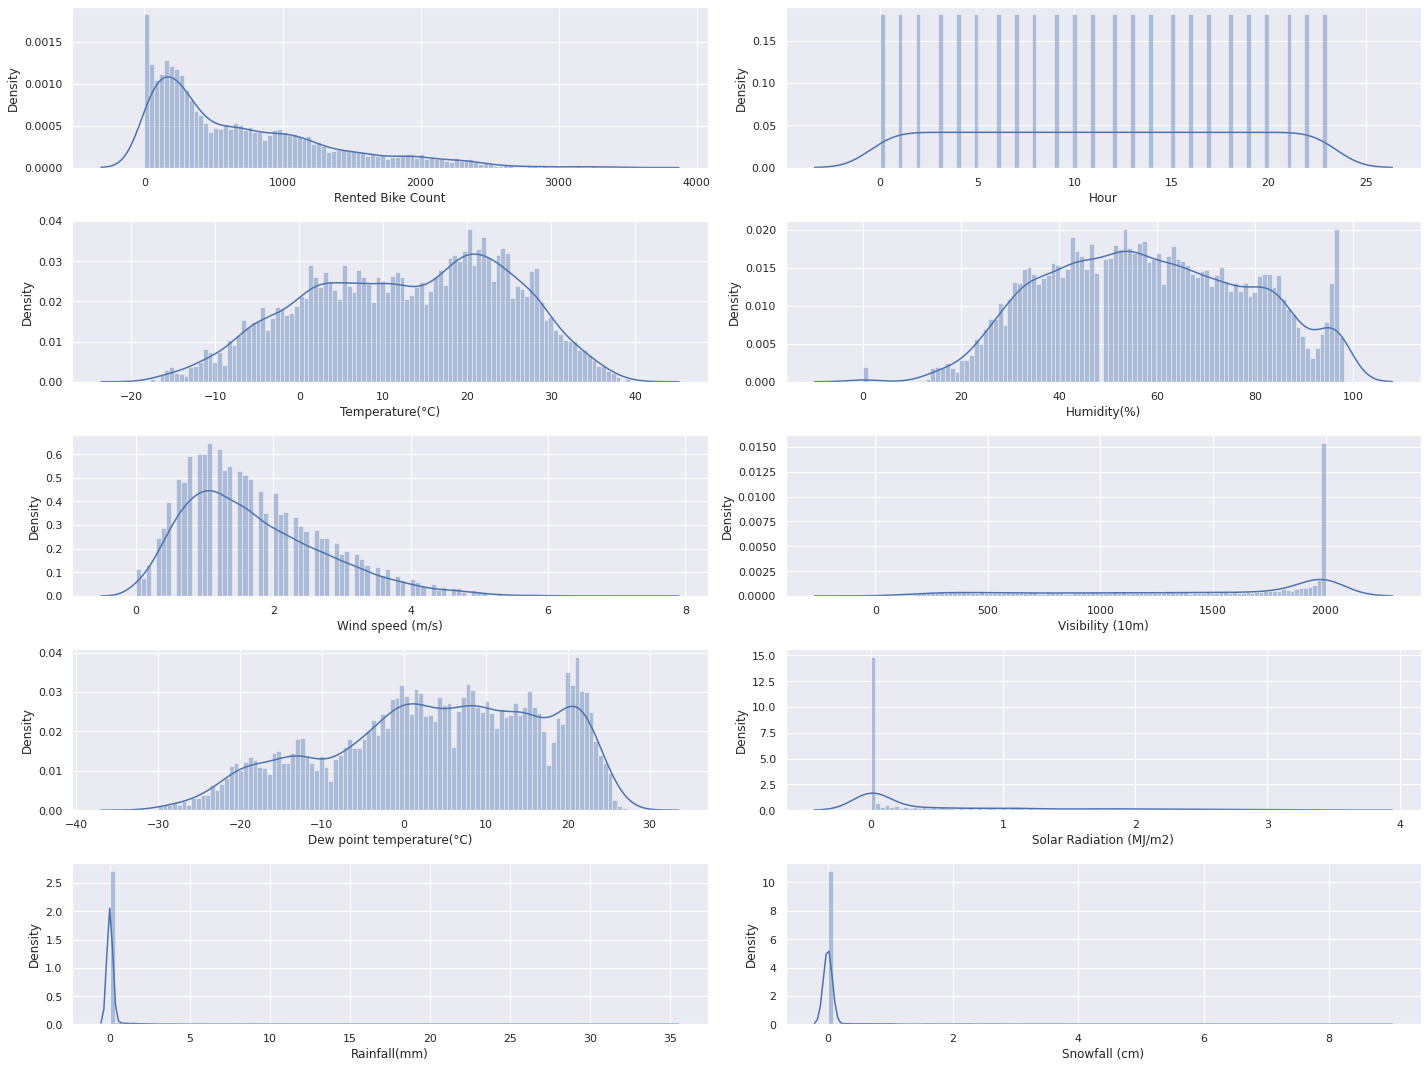

In [ ]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,2,count)
    count += 1
    sns.distplot(df[column], bins = 100)
    
    plt.tight_layout()

### **Observation:**
* **Here we can see that Rented Bike count is postively skewed**
* **and temperatur is also not correctly distributed**
* **and also windspeed column is skewed**


### * There can be many reason to all different distribution of columns we will try to look the outliers and try to analyse it more

### **Checking outliers**

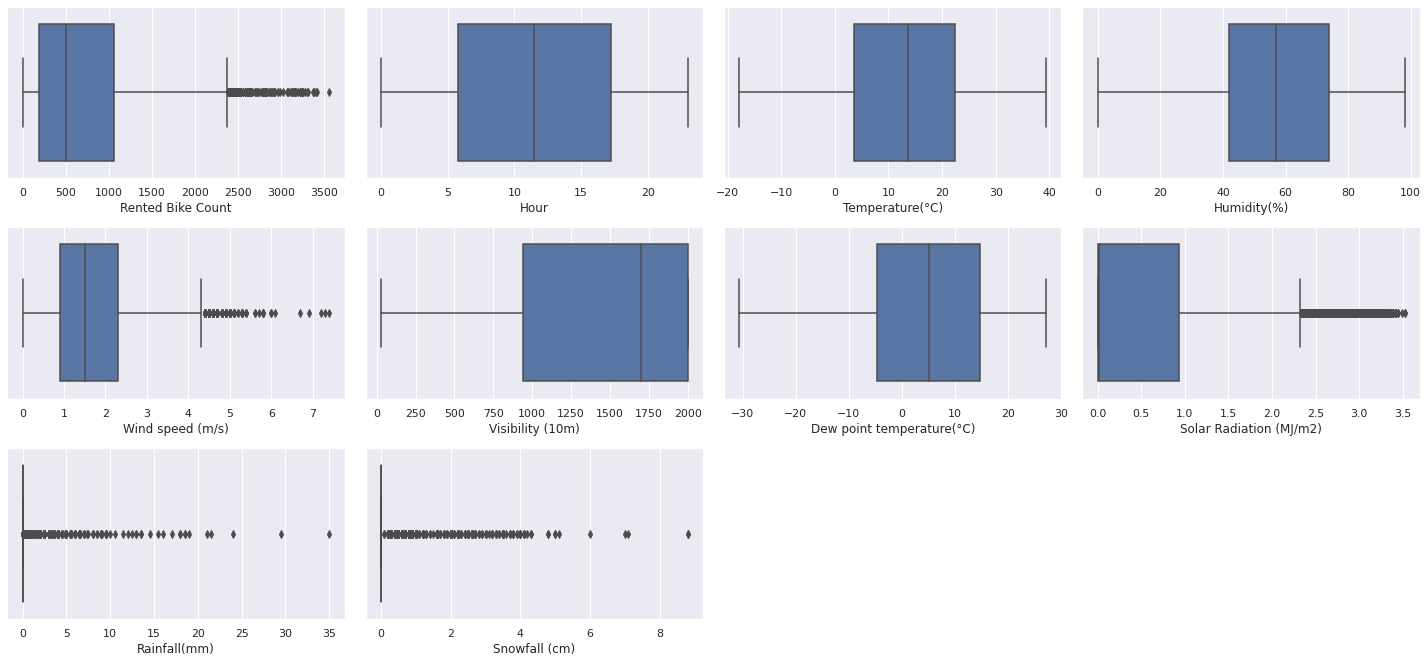

In [ ]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,4,count)
    
    count += 1
    sns.boxplot(df[column])
    
    plt.tight_layout()

### **Observation :**

* **We can observe here that many columns like rented bike count, solar radiation, rainfall, snowfall contains outliers**


**We will look into it more and treat the outliers also**